### DEEP LEARNING

In [1]:
# !pip install tensorflow

In [2]:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense

In [3]:
#!pip install torch torchvision torchaudio

In [4]:
#pip install numpy pandas matplotlib tensorflow scikit-learn

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
data = pd.read_excel('predict_energy_consumption.xlsx')
data

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013258,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261
...,...,...,...,...,...
995,17.289552,59.417309,17.305915,497.896331,453.828793
996,37.932839,77.396877,3.145464,400.961061,103.721455
997,18.420466,24.137481,6.195757,455.115084,197.529277
998,38.755934,23.423283,5.800911,576.946528,417.085421


In [7]:
data.head(10)

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013258,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261
5,18.899863,59.527002,15.187965,849.547339,170.678465
6,16.452090,61.536594,8.994797,915.478354,212.483627
7,36.654404,70.951739,15.534211,110.941094,233.805012
8,30.027875,34.980081,1.307323,706.617927,355.863748
9,32.701814,49.365498,9.751424,146.652219,75.506194


In [8]:
data.tail()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
995,17.289552,59.417309,17.305915,497.896331,453.828793
996,37.932839,77.396877,3.145464,400.961061,103.721455
997,18.420466,24.137481,6.195757,455.115084,197.529277
998,38.755934,23.423283,5.800911,576.946528,417.085421
999,26.150144,36.931224,17.428281,245.230623,318.790570


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         1000 non-null   float64
 1   humidity            1000 non-null   float64
 2   wind_speed          1000 non-null   float64
 3   solar_irradiance    1000 non-null   float64
 4   energy_consumption  1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


In [10]:
data.describe()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.256414,50.421038,10.048115,541.337543,272.347395
std,7.303434,17.531394,5.813484,257.840410,129.064474
min,15.115801,20.193096,0.000233,100.588052,50.013823
25%,20.899332,34.464456,5.227020,317.710693,160.238303
50%,27.420184,51.124034,10.012278,535.851355,272.569144
75%,33.607990,65.627903,15.182071,763.786729,382.997053
max,39.992942,79.964824,19.956417,999.601933,498.987225


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,1000.0,27.256414,7.303434,15.115801,20.899332,27.420184,33.607990,39.992942
humidity,1000.0,50.421038,17.531394,20.193096,34.464456,51.124034,65.627903,79.964824
wind_speed,1000.0,10.048115,5.813484,0.000233,5.227020,10.012278,15.182071,19.956417
solar_irradiance,1000.0,541.337543,257.840410,100.588052,317.710693,535.851355,763.786729,999.601933
energy_consumption,1000.0,272.347395,129.064474,50.013823,160.238303,272.569144,382.997053,498.987225


In [12]:
data.isnull().sum()

temperature           0
humidity              0
wind_speed            0
solar_irradiance      0
energy_consumption    0
dtype: int64

In [13]:
data.isnull().sum().sum()

0

In [14]:
data.columns

Index(['temperature', 'humidity', 'wind_speed', 'solar_irradiance',
       'energy_consumption'],
      dtype='object')

In [15]:
data.axes

[RangeIndex(start=0, stop=1000, step=1),
 Index(['temperature', 'humidity', 'wind_speed', 'solar_irradiance',
        'energy_consumption'],
       dtype='object')]

In [16]:
data.shape

(1000, 5)

#### Separating independent and target values

In [17]:
x = data[['temperature', 'humidity', 'wind_speed', 'solar_irradiance']].values
y = data['energy_consumption'].values

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)), 
    Dense(32, activation='relu'), 
    Dense(1)
])
from warnings import filterwarnings
filterwarnings('ignore')

C:\Users\gahuk\anaconda3\New folder\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
#mean squared error and mean absolute error
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [22]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 89772.4609 - mae: 272.5959 - val_loss: 83601.8438 - val_mae: 258.8459
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 89045.2656 - mae: 268.7415 - val_loss: 82986.7344 - val_mae: 257.6555
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 90589.1328 - mae: 271.1919 - val_loss: 82029.5156 - val_mae: 255.7903
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 88006.3359 - mae: 265.8309 - val_loss: 80659.8984 - val_mae: 253.0989
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 89825.2422 - mae: 271.9727 - val_loss: 78722.9219 - val_mae: 249.2369
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 81728.8438 - mae: 256.0787 - val_loss: 76095.1719 - val_mae: 243.8977
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 81156.0938 - mae: 253.8359 - val_loss: 72592.6406 - val_mae: 236.5803
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 82979.2812 - mae: 257.2968 - val_loss: 68147.5

In [23]:
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Mean Absoulte Error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18263.2812 - mae: 115.6789 
Test Mean Absoulte Error: 115.63


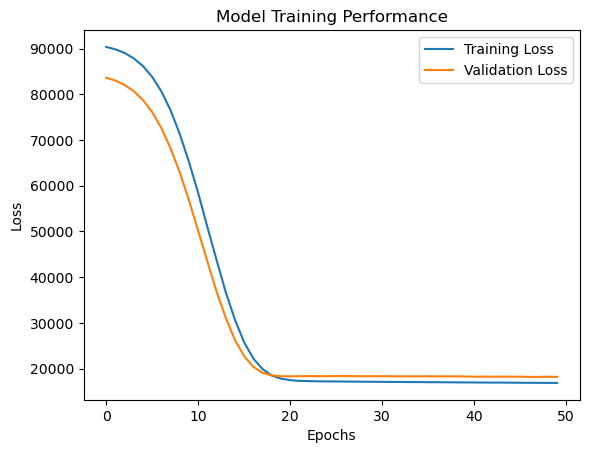

In [24]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [25]:
predictions = model.predict(x_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([[283.63376],
       [251.06732],
       [253.38089],
       [208.41577],
       [346.24762],
       [307.15945],
       [333.00934],
       [290.08398],
       [285.22635],
       [267.8595 ],
       [233.666  ],
       [255.57138],
       [289.59375],
       [239.15674],
       [283.98236],
       [305.78082],
       [264.33496],
       [310.3377 ],
       [283.81537],
       [242.5333 ],
       [274.61435],
       [288.57962],
       [269.4106 ],
       [273.61926],
       [248.41208],
       [240.23499],
       [257.37628],
       [323.64282],
       [302.10016],
       [265.14337],
       [230.97696],
       [301.886  ],
       [290.01718],
       [269.69366],
       [321.4473 ],
       [290.6737 ],
       [216.51065],
       [253.83698],
       [276.94702],
       [241.5247 ],
       [245.76337],
       [252.81061],
       [251.15881],
       [257.10004],
       [268.05478],
       [251.38496],
       [261.26178],
       [251.2594 ],
       [288.3027 ],
       [305.06332],


plt.scatter(y_test, predictions)
plt.xlabel('True Energy Consumptions')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predictions vs True Values')
plt.show()